# ATP Men's Tour
ATP Men's Tour Dataset consist of data of tennis players scraped from results of the men's ATP tour date back to January 2000, including Grand Slams, Masters Series, Masters Cup and International Series competitions.

Categorized Attribute Information:

1. ATP = Tournament number (men)
2. WTA = Tournament number (women)
3. Location = Venue of tournament
4. Tournament = Name of tounament (including sponsor if relevant)
5. Data = Date of match (note: prior to 2003 the date shown for all matches played in a single tournament is the start date)
6. Series = Name of ATP tennis series (Grand Slam, Masters, International or International Gold)
7. Tier = Tier (tournament ranking) of WTA tennis series.
8. Court = Type of court (outdoors or indoors)
9. Surface = Type of surface (clay, hard, carpet or grass)
10. Round = Round of match
11. Best of = Maximum number of sets playable in match
12. Winner = Match winner
13. Loser = Match loser
14. WRank = ATP Entry ranking of the match winner as of the start of the tournament
15. LRank = ATP Entry ranking of the match loser as of the start of the tournament
16. WPts = ATP Entry points of the match winner as of the start of the tournament
17. LPts = ATP Entry points of the match loser as of the start of the tournament
18. W1 = Number of games won in 1st set by match winner
19. L1 = Number of games won in 1st set by match loser
20. W2 = Number of games won in 2nd set by match winner
21. L2 = Number of games won in 2nd set by match loser
22. W3 = Number of games won in 3rd set by match winner
23. L3 = Number of games won in 3rd set by match loser
24. W4 = Number of games won in 4th set by match winner
25. L4 = Number of games won in 4th set by match loser
26. W5 = Number of games won in 5th set by match winner
27. L5 = Number of games won in 5th set by match loser
28. Wsets = Number of sets won by match winner
29. Lsets = Number of sets won by match loser
30. Comment = Comment on the match (Completed, won through retirement of loser, or via Walkover)


# Importing  DataFile

Import the packages and reading the ATP Men's Tour data file

In [32]:
import pandas as pd
%matplotlib inline
#importing CSV file
ten=pd.read_csv("C://Users//Balaji//Assignment//Tennis.csv",encoding='latin-1',low_memory=False)
print(ten)

       ATP        Location                          Tournament        Date  \
0        1        Adelaide  Australian Hardcourt Championships    3/1/2000   
1        1        Adelaide  Australian Hardcourt Championships    3/1/2000   
2        1        Adelaide  Australian Hardcourt Championships    3/1/2000   
3        1        Adelaide  Australian Hardcourt Championships    3/1/2000   
4        1        Adelaide  Australian Hardcourt Championships    3/1/2000   
5        1        Adelaide  Australian Hardcourt Championships    3/1/2000   
6        1        Adelaide  Australian Hardcourt Championships    3/1/2000   
7        1        Adelaide  Australian Hardcourt Championships    3/1/2000   
8        1        Adelaide  Australian Hardcourt Championships    3/1/2000   
9        1        Adelaide  Australian Hardcourt Championships    3/1/2000   
10       1        Adelaide  Australian Hardcourt Championships    3/1/2000   
11       1        Adelaide  Australian Hardcourt Championships  

### PART A - Cleaning and EDA

Data Cleaning

###### Missing values

Checking to find any missing values available in the dataset.

In [33]:
print(ten.apply(lambda x : sum(x.isnull()),axis = 0))

ATP               0
Location          0
Tournament        0
Date              0
Series            0
Court             0
Surface           0
Round             0
Best of           0
Winner            0
Loser             0
WRank            15
LRank            71
W1              229
L1              229
W2              690
L2              689
W3            25287
L3            25287
W4            42426
L4            42426
W5            45035
L5            45035
Wsets           190
Lsets           190
Comment           0
dtype: int64



10(W1-W5 & L1-L5) of the columns having around 45k of data missing contains details of Winner's and losers score in each set, which arent present for all the players. Dropping these columns will affect the distribution analysis. so we will fill the mising values with zero. Also we will fill other columns which has missing values as Zero.


In [34]:
import numpy as np
ten_dup = ten.copy()

#replacing missing value with Zero.
ten_dup = ten_dup.replace(np.nan, 0)

In [35]:
print(ten_dup.apply(lambda x : sum(x.isnull()),axis = 0))

ATP           0
Location      0
Tournament    0
Date          0
Series        0
Court         0
Surface       0
Round         0
Best of       0
Winner        0
Loser         0
WRank         0
LRank         0
W1            0
L1            0
W2            0
L2            0
W3            0
L3            0
W4            0
L4            0
W5            0
L5            0
Wsets         0
Lsets         0
Comment       0
dtype: int64


In [36]:
ten_dup.Comment.unique()

array(['Completed', 'Retired', 'Walkover', 'Retied', 'Full Time', 'NSY',
       'Walover', 'R_Bag', 'Compleed', 'Disqualified', 'retired', 'Sched'], dtype=object)

In [37]:
print((ten_dup['Comment']=="Retired").sum())
print((ten_dup['Comment']=="Walkover").sum())
print((ten_dup['Comment']=="Retied").sum())
print((ten_dup['Comment']=="retired").sum())
print((ten_dup['Comment']=="Walover").sum())
print((ten_dup['Comment']=="R_Bag").sum())
print((ten_dup['Comment']=="Disqualified").sum())


1505
226
2
1
1
1
1


There are 46652 rows of matches entry out of which 1737 matches were not completed due to various reasons like walkover, Retired etc.
Having incomplete matches in the data frame would act as garbage in the analysis of Winning sets and performance of player.

#### Remove and impute improper data

Creating another dataframe having no rows with incomplete matches.

In [38]:
# for column
ten_dup = ten_dup[ten_dup.Comment != "Retired"]
ten_dup = ten_dup[ten_dup.Comment != "Walkover"]
ten_dup = ten_dup[ten_dup.Comment != "Retied"]
ten_dup = ten_dup[ten_dup.Comment != "NSY"]
ten_dup = ten_dup[ten_dup.Comment != "R_Bag"]
ten_dup = ten_dup[ten_dup.Comment != "Walover"]

In [39]:
ten_dup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44916 entries, 0 to 46651
Data columns (total 26 columns):
ATP           44916 non-null int64
Location      44916 non-null object
Tournament    44916 non-null object
Date          44916 non-null object
Series        44916 non-null object
Court         44916 non-null object
Surface       44916 non-null object
Round         44916 non-null object
Best of       44916 non-null int64
Winner        44916 non-null object
Loser         44916 non-null object
WRank         44916 non-null object
LRank         44916 non-null object
W1            44916 non-null float64
L1            44916 non-null float64
W2            44916 non-null float64
L2            44916 non-null float64
W3            44916 non-null float64
L3            44916 non-null float64
W4            44916 non-null float64
L4            44916 non-null float64
W5            44916 non-null float64
L5            44916 non-null float64
Wsets         44916 non-null float64
Lsets         4491

# Data Distributed

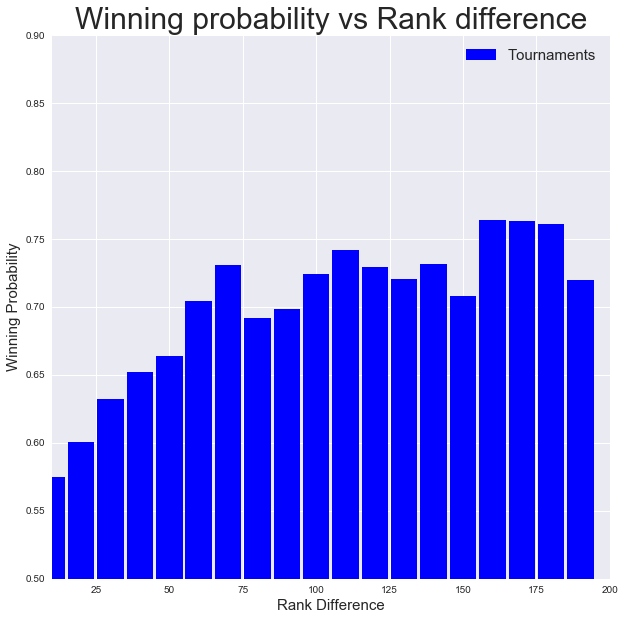

In [76]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
np.seterr(divide='ignore', invalid='ignore')

ten=pd.read_csv("C://Users//Balaji//Assignment//Tennis.csv",encoding='latin-1', low_memory=False)
ten_dup = ten.copy()
ten_dup = ten_dup.replace(np.nan, 0)


ten_dup.WRank = pd.to_numeric(ten_dup.WRank, errors = 'coerce') 
ten_dup.LRank = pd.to_numeric(ten_dup.LRank, errors = 'coerce')
ten_dup['Difference'] =  ten_dup.LRank - ten_dup.WRank
ten_dup['Round_10'] = 10*round(np.true_divide(ten_dup.Difference,10))
ten_dup['Round_20'] = 20*round(np.true_divide(ten_dup.Difference,20))
ten_dup['Sets Diff'] = ten_dup.W1+ten_dup.W2+ten_dup.W3+ten_dup.W4+ten_dup.W5 - (ten_dup.L1+ten_dup.L2+ten_dup.L3+ten_dup.L4+ten_dup.L5)

plt.figure(figsize = (10,10))
bins = np.arange(10,200)
ten_dup_prob = []

for value in bins:
    pos = value
    neg = -value
    pos_wins = len(ten_dup[ten_dup.Round_10 == pos])
    neg_wins = len(ten_dup[ten_dup.Round_10 == neg])
    ten_dup_prob.append(np.true_divide(pos_wins,pos_wins + neg_wins))

plt.bar(bins,ten_dup_prob,width = 9, color = 'Blue') 
plt.title('Winning probability vs Rank difference', fontsize = 30)
plt.xlabel('Rank Difference',fontsize = 15)
plt.ylabel('Winning Probability',fontsize = 15)
plt.xlim([10,200])
plt.ylim([0.5,0.9])
plt.legend(['Tournaments'], loc = 1, fontsize = 15)
plt.show()





 The most obvious and trivial conclusion is of course that the chances of winning increases as the rank difference does.
 the 

# Summary Statistics

In [41]:
ten.describe()

,ATP,Best of,W1,L1,W2,L2,W3,L3,W4,L4,W5,L5,Wsets,Lsets
count,46652.000000,46652.000000,46423.000000,46423.000000,45962.000000,45963.000000,21365.000000,21365.000000,4226.000000,4226.000000,1617.000000,1617.000000,46462.000000,46462.000000
mean,32.931000,3.373746,5.792667,4.043211,5.772856,3.853621,6.018254,3.592745,5.777094,3.871510,6.623995,3.759431,2.141815,0.405299
std,17.953268,0.780315,1.239261,1.847833,1.253846,1.878397,0.936149,1.767542,1.264913,1.891446,2.266222,2.793803,0.462600,0.558087
min,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,3.000000,6.000000,3.000000,6.000000,2.000000,6.000000,2.000000,6.000000,2.000000,6.000000,2.000000,2.000000,0.000000
50%,33.000000,3.000000,6.000000,4.000000,6.000000,4.000000,6.000000,4.000000,6.000000,4.000000,6.000000,4.000000,2.000000,0.000000
75%,49.000000,3.000000,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000,6.000000,6.000000,7.000000,5.000000,2.000000,1.000000
max,69.000000,5.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,70.000000,68.000000,3.000000,2.000000


#### The above statistical data shows a summary of all fields. The most interesting patterns can be seen in the following fields:

    Most of the ATP Tours are best of 3 and not best of 5. only 3 sets are played in most of the matches.
    The mean of the scores of the 2nd set of losing player is around 3.8 which means that most of the Losing players lose their second sets.
    Also the maximum value of all the winning sets and Losing Sets are 7 except in some special cases.

In [42]:
pd.set_option('display.max_columns', 500)
ten_dup.head()

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Loser,WRank,LRank,W1,L1,W2,L2,W3,L3,W4,L4,W5,L5,Wsets,Lsets,Comment,Diff,Round_10,Round_20,Sets Diff
0,1,Adelaide,Australian Hardcourt Championships,3/1/2000,International,Outdoor,Hard,1st Round,3,Dosedel S.,Ljubicic I.,63.0,77.0,6.0,4.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,14.0,10.0,20.0,6.0
1,1,Adelaide,Australian Hardcourt Championships,3/1/2000,International,Outdoor,Hard,1st Round,3,Enqvist T.,Clement A.,5.0,56.0,6.0,3.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,51.0,50.0,60.0,6.0
2,1,Adelaide,Australian Hardcourt Championships,3/1/2000,International,Outdoor,Hard,1st Round,3,Escude N.,Baccanello P.,40.0,655.0,6.0,7.0,7.0,5.0,6.0,3.0,0.0,0.0,0.0,0.0,2.0,1.0,Completed,615.0,620.0,620.0,4.0
3,1,Adelaide,Australian Hardcourt Championships,3/1/2000,International,Outdoor,Hard,1st Round,3,Federer R.,Knippschild J.,65.0,87.0,6.0,1.0,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,22.0,20.0,20.0,7.0
4,1,Adelaide,Australian Hardcourt Championships,3/1/2000,International,Outdoor,Hard,1st Round,3,Fromberg R.,Woodbridge T.,81.0,198.0,7.0,6.0,5.0,7.0,6.0,4.0,0.0,0.0,0.0,0.0,2.0,1.0,Completed,117.0,120.0,120.0,1.0


#  Anomalies/Outliers

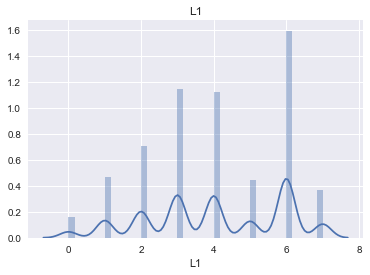

In [43]:
sns.distplot(ten_dup['L1']);
plt.title("L1")

The above distribution is normal distribution.This distribution shows the probability ofthe loser scoring '6' in his first set is o.5. The probability of the loser scoring 3 in his first set is 0.3.

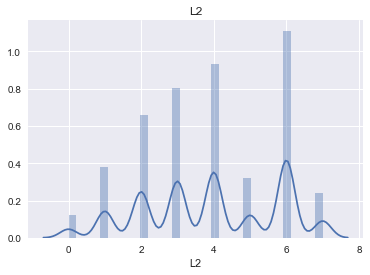

In [63]:
sns.distplot(ten_dup['L2']);
plt.title("L2")

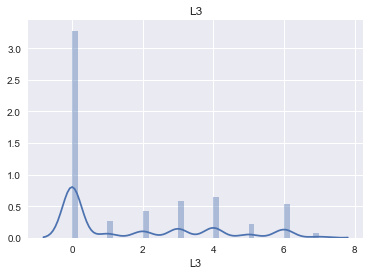

In [66]:
sns.distplot(ten_dup['L3']);
plt.title("L3")

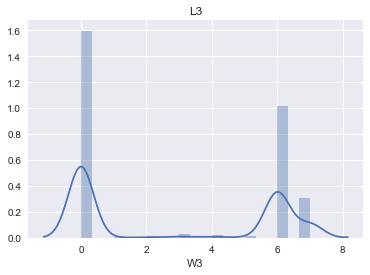

In [73]:
sns.distplot(ten_dup['W3']);
plt.title("L3")

From the above ditplot we can see that in sets W3 , the probability of winner scoring zero and six points are more compared to other points.

In [69]:
ten_dup_gs = ten_dup [ten_dup.Series == 'Grand Slam']
ten_dup_fedwin = ten_dup_gs[ten_dup_gs.Winner == 'Federer R.']
ten_dup_fedlos = ten_dup_gs[ten_dup_gs.Loser == 'Federer R.']
ten_fed_gs = pd.concat([ten_dup_fedwin, ten_dup_fedlos], ignore_index=True)
pd.set_option('display.max_columns', 500)
ten_fed_gs.head()

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Loser,WRank,LRank,W1,L1,W2,L2,W3,L3,W4,L4,W5,L5,Wsets,Lsets,Comment,Diff,Round_10,Round_20,Sets Diff
0,6,Melbourne,Australian Open,17/01/2000,Grand Slam,Outdoor,Hard,1st Round,5,Federer R.,Chang M.,62.0,38.0,6.0,4.0,6.0,4.0,7.0,6.0,0.0,0.0,0.0,0.0,3.0,0.0,Completed,-24.0,-20.0,-20.0,5.0
1,6,Melbourne,Australian Open,17/01/2000,Grand Slam,Outdoor,Hard,2nd Round,5,Federer R.,Kroslak J.,62.0,104.0,7.0,6.0,6.0,2.0,6.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,Completed,42.0,40.0,40.0,8.0
2,32,Paris,French Open,29/05/2000,Grand Slam,Outdoor,Clay,1st Round,5,Federer R.,Arthurs W.,54.0,106.0,7.0,6.0,6.0,3.0,1.0,6.0,6.0,3.0,0.0,0.0,3.0,1.0,Completed,52.0,50.0,60.0,2.0
3,32,Paris,French Open,29/05/2000,Grand Slam,Outdoor,Clay,2nd Round,5,Federer R.,Gambill J.M.,54.0,69.0,7.0,6.0,6.0,3.0,6.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,Completed,15.0,20.0,20.0,7.0
4,32,Paris,French Open,29/05/2000,Grand Slam,Outdoor,Clay,3rd Round,5,Federer R.,Kratochvil M.,54.0,120.0,7.0,6.0,6.0,4.0,2.0,6.0,6.0,7.0,8.0,6.0,3.0,2.0,Completed,66.0,70.0,60.0,0.0


In [45]:
ten_fed_gs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 30 columns):
ATP           360 non-null int64
Location      360 non-null object
Tournament    360 non-null object
Date          360 non-null object
Series        360 non-null object
Court         360 non-null object
Surface       360 non-null object
Round         360 non-null object
Best of       360 non-null int64
Winner        360 non-null object
Loser         360 non-null object
WRank         360 non-null float64
LRank         360 non-null float64
W1            360 non-null float64
L1            360 non-null float64
W2            360 non-null float64
L2            360 non-null float64
W3            360 non-null float64
L3            360 non-null float64
W4            360 non-null float64
L4            360 non-null float64
W5            360 non-null float64
L5            360 non-null float64
Wsets         360 non-null float64
Lsets         360 non-null float64
Comment       360 non-null object

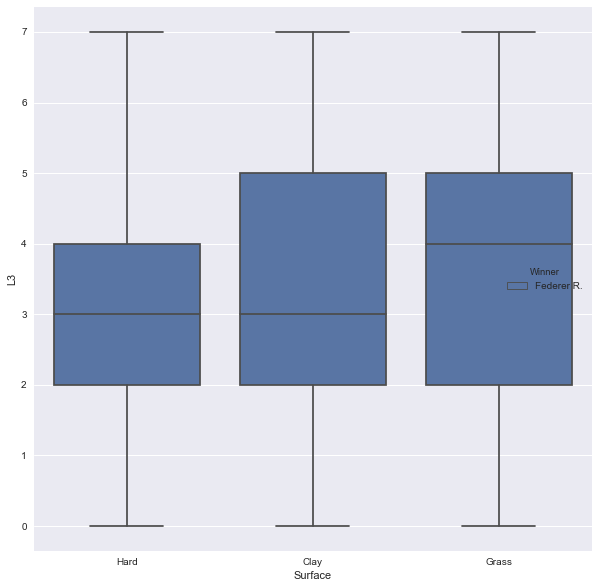

In [62]:
f, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(y = "L3", x = "Surface", hue = "Winner", data = ten_dup_fedwin)

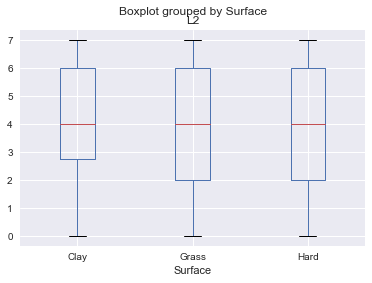

In [49]:
ten_dup = ten_dup[ten_dup.Comment != "Retired"]
ten_dup = ten_dup[ten_dup.Comment != "Walkover"]
ten_dup = ten_dup[ten_dup.Comment != "Retied"]
ten_dup = ten_dup[ten_dup.Comment != "NSY"]
ten_dup = ten_dup[ten_dup.Comment != "R_Bag"]
ten_dup = ten_dup[ten_dup.Comment != "Walover"]

ten_fed_gs.boxplot(['L2'], 'Surface')

# Columns correlated?

             L1     WRank     LRank        W1        L2        W2        W3  \
L1     1.000000  0.045801 -0.052161 -0.129632  0.080665  0.154799  0.336752   
WRank  0.045801  1.000000  0.088362 -0.018597  0.026095 -0.034511 -0.002654   
LRank -0.052161  0.088362  1.000000  0.017968 -0.041462  0.030272 -0.039961   
W1    -0.129632 -0.018597  0.017968  1.000000  0.101459  0.030575 -0.336074   
L2     0.080665  0.026095 -0.041462  0.101459  1.000000 -0.000939  0.354456   
W2     0.154799 -0.034511  0.030272  0.030575 -0.000939  1.000000 -0.215479   
W3     0.336752 -0.002654 -0.039961 -0.336074  0.354456 -0.215479  1.000000   
L3     0.280264  0.008893 -0.045559 -0.260990  0.307381 -0.168969  0.823973   

             L3  
L1     0.280264  
WRank  0.008893  
LRank -0.045559  
W1    -0.260990  
L2     0.307381  
W2    -0.168969  
W3     0.823973  
L3     1.000000  


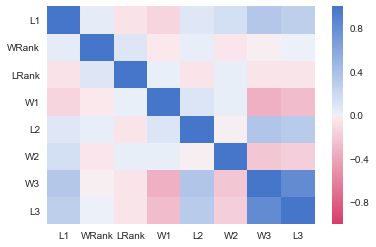

In [47]:
import seaborn as sns
cmap = sns.diverging_palette(0, 255, sep=1, n=256, as_cmap=True)

correlations = ten_dup[['L1', 'WRank', 'LRank', 'W1','L2','W2','W3','L3']].corr()
print (correlations)
sns.heatmap(correlations, cmap=cmap)

The columns are not correlated. From the above heatmap we can clearly see the probability of the correlation of different columns are zero or negative.